In [81]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import LSTM

# sin(x)

In [87]:
sinModel = Sequential()
sinModel.add(LSTM(10, activation='tanh'))
sinModel.add(Dense(1, activation='tanh'))
sinModel.compile(optimizer='adam', loss='mse')

In [88]:
def train_function(x):
    return np.sin(x)
    
def split_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
                end_ix = i + n_steps
                if end_ix > len(sequence)-1:
                        break
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
        return np.array(X), np.array(y)

# define input sequence
xaxis = np.arange(0, 50*np.pi, 0.1)
train_seq = train_function(xaxis)
n_steps = 20
X, y = split_sequence(train_seq, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print("X.shape = {}".format(X.shape))
print("y.shape = {}".format(y.shape))

X.shape = (1551, 20, 1)
y.shape = (1551,)


Epoch 1/20
49/49 [==============================] - 2s 5ms/step - loss: 0.1813
Epoch 2/20
49/49 [==============================] - 0s 5ms/step - loss: 0.0942
Epoch 3/20
49/49 [==============================] - 0s 6ms/step - loss: 0.0331
Epoch 4/20
49/49 [==============================] - 0s 5ms/step - loss: 0.0158
Epoch 5/20
49/49 [==============================] - 0s 5ms/step - loss: 0.0118
Epoch 6/20
49/49 [==============================] - 0s 5ms/step - loss: 0.0096
Epoch 7/20
49/49 [==============================] - 0s 5ms/step - loss: 0.0076
Epoch 8/20
49/49 [==============================] - 0s 5ms/step - loss: 0.0061
Epoch 9/20
49/49 [==============================] - 0s 5ms/step - loss: 0.0050
Epoch 10/20
49/49 [==============================] - 0s 5ms/step - loss: 0.0038
Epoch 11/20
49/49 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 12/20
49/49 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 13/20
49/49 [==============================

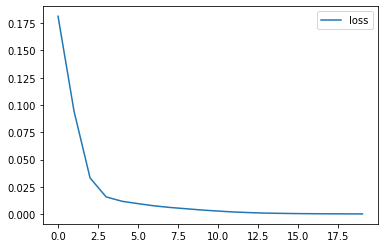

In [89]:
history = sinModel.fit(X, y, epochs=20, verbose=1)
plt.plot(history.history['loss'], label="loss")
plt.legend(loc="upper right")
plt.show()

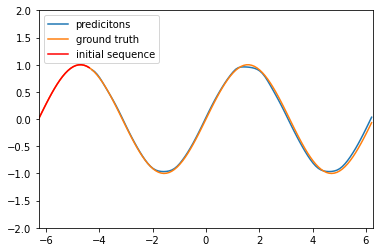

In [108]:
test_xaxis = np.arange(-2 * np.pi, 2 * np.pi, 0.1)
def test_function(x):
    return np.sin(x)
calc_y = test_function(test_xaxis)
# start with initial n values, rest will be predicted
test_sin_y = calc_y[:n_steps]
results = []
for i in range( len(test_xaxis) - n_steps ):
    net_input = test_sin_y[i : i + n_steps]
    net_input = net_input.reshape((1, n_steps, n_features))
    y = sinModel.predict(net_input, verbose=0)
    test_sin_y = np.append(test_sin_y, y)
plt.plot(test_xaxis[n_steps:], test_sin_y[n_steps:], label="predicitons")
plt.plot(test_xaxis, calc_y, label="ground truth")
plt.plot(test_xaxis[:n_steps], test_sin_y[:n_steps], label="initial sequence", color="red")
plt.legend(loc='upper left')
plt.xlim(-2 * np.pi, 2 * np.pi)
plt.ylim(-2, 2)
plt.show()

# cos(x)

In [91]:
cosModel = Sequential()
cosModel.add(LSTM(10, activation='tanh'))
cosModel.add(Dense(1, activation='tanh'))
cosModel.compile(optimizer='adam', loss='mse')

In [93]:
def train_function(x):
    return np.cos(x)
    
def split_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
                end_ix = i + n_steps
                if end_ix > len(sequence)-1:
                        break
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
        return np.array(X), np.array(y)

# define input sequence
xaxis = np.arange(0, 50*np.pi, 0.1)
train_seq = train_function(xaxis)
n_steps = 20
X, y = split_sequence(train_seq, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print("X.shape = {}".format(X.shape))
print("y.shape = {}".format(y.shape))

X.shape = (1551, 20, 1)
y.shape = (1551,)


Epoch 1/20
49/49 [==============================] - 2s 5ms/step - loss: 0.4250
Epoch 2/20
49/49 [==============================] - 0s 5ms/step - loss: 0.2033
Epoch 3/20
49/49 [==============================] - 0s 6ms/step - loss: 0.1102
Epoch 4/20
49/49 [==============================] - 0s 5ms/step - loss: 0.0491
Epoch 5/20
49/49 [==============================] - 0s 5ms/step - loss: 0.0231
Epoch 6/20
49/49 [==============================] - 0s 5ms/step - loss: 0.0147
Epoch 7/20
49/49 [==============================] - 0s 5ms/step - loss: 0.0113
Epoch 8/20
49/49 [==============================] - 0s 5ms/step - loss: 0.0091
Epoch 9/20
49/49 [==============================] - 0s 6ms/step - loss: 0.0073
Epoch 10/20
49/49 [==============================] - 0s 5ms/step - loss: 0.0058
Epoch 11/20
49/49 [==============================] - 0s 5ms/step - loss: 0.0045
Epoch 12/20
49/49 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 13/20
49/49 [==============================

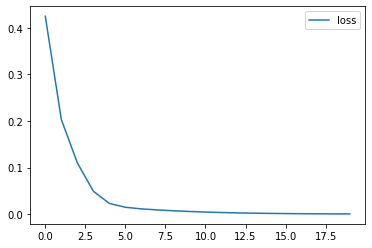

In [94]:
history = cosModel.fit(X, y, epochs=20, verbose=1)
plt.plot(history.history['loss'], label="loss")
plt.legend(loc="upper right")
plt.show()

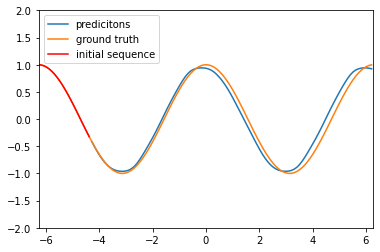

In [107]:
test_xaxis = np.arange(-2 * np.pi, 2 * np.pi, 0.1)
def test_function(x):
    return np.cos(x)
calc_y = test_function(test_xaxis)
# start with initial n values, rest will be predicted
test_cos_y = calc_y[:n_steps]
results = []
for i in range( len(test_xaxis) - n_steps ):
    net_input = test_cos_y[i : i + n_steps]
    net_input = net_input.reshape((1, n_steps, n_features))
    y = cosModel.predict(net_input, verbose=0)
    test_cos_y = np.append(test_cos_y, y)
plt.plot(test_xaxis[n_steps:], test_cos_y[n_steps:], label="predicitons")
plt.plot(test_xaxis, calc_y, label="ground truth")
plt.plot(test_xaxis[:n_steps], test_cos_y[:n_steps], label="initial sequence", color="red")
plt.legend(loc='upper left')
plt.xlim(-2 * np.pi, 2 * np.pi)
plt.ylim(-2, 2)
plt.show()

# tan(x)

In [110]:
test_xaxis = np.arange(-2 * np.pi, 2 * np.pi, 0.1)
def test_function(x):
    return np.tan(x)
calc_y = test_function(test_xaxis)

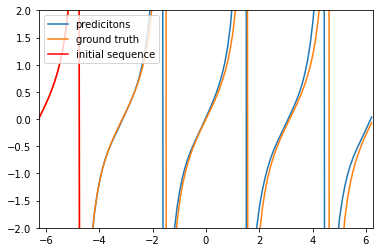

In [111]:
plt.plot(test_xaxis[n_steps:],  test_sin_y[n_steps:] / test_cos_y[n_steps:], label="predicitons")
plt.plot(test_xaxis, calc_y, label="ground truth")
plt.plot(test_xaxis[:n_steps], test_sin_y[:n_steps] / test_cos_y[:n_steps], label="initial sequence", color="red")
plt.legend(loc='upper left')
plt.xlim(-2 * np.pi, 2 * np.pi)
plt.ylim(-2, 2)
plt.show()